### 1.数据集收集


In [1]:
'''
Description: 
Author: 
Date: 2025-03-10 08:51:48
LastEditTime: 2025-03-10 16:09:38
LastEditors: dengxiang(dengxiang@cpgroup.cn)
'''
# Cell 1: 导入库
import backtrader as bt
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
# 主程序
if __name__ == '__main__':
     stock_data=pd.read_csv('btc_4h_data_2018_to_2025.csv')
     print(stock_data[stock_data["Volume"]==0])  # 查看交易量为0的数据

     # 把 'Open time' 列转换为 datetime 类型
     # df['Open time'] = pd.to_datetime(df['Open time'])
     # 3. 把时间列设为索引
     stock_data = stock_data.set_index('Open time')
     stock='BTCUSD'
     stock_data.info()
     print(stock_data.describe())


 
   



Empty DataFrame
Columns: [Open time, Open, High, Low, Close, Volume, Close time, Quote asset volume, Number of trades, Taker buy base asset volume, Taker buy quote asset volume, Ignore]
Index: []
<class 'pandas.core.frame.DataFrame'>
Index: 16035 entries, 2018-01-01 00:00:00 to 2025-04-29 00:00:00
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Open                          16035 non-null  float64
 1   High                          16035 non-null  float64
 2   Low                           16035 non-null  float64
 3   Close                         16035 non-null  float64
 4   Volume                        16035 non-null  float64
 5   Close time                    16035 non-null  object 
 6   Quote asset volume            16035 non-null  float64
 7   Number of trades              16035 non-null  int64  
 8   Taker buy base asset volume   16035 non-null  float64
 9   Taker buy quot

In [2]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import talib


periods = [13, 34, 144, 169, 576, 676]
for period in periods:
    stock_data[f"EMA{period}"] = ta.ema(stock_data["Close"], length=period)
# 计算 RSI（14周期）
stock_data['RSI'] = ta.rsi(stock_data['Close'], length=14)
stock_data['OBV'] = talib.OBV(stock_data['Close'], stock_data['Volume'])

stock_data['ADX']=ta.adx(stock_data['High'], stock_data['Low'], stock_data['Close'], length=14)['ADX_14']

# 计算macd
_,_,stock_data['MACD']=talib.MACD(stock_data['Close'], fastperiod=13, slowperiod=34, signalperiod=9)

stock_data.dropna(inplace=True)

stock_data.info()

print("计算后的ADX统计：", stock_data["ADX"].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 15360 entries, 2018-04-24 16:00:00 to 2025-04-29 00:00:00
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Open                          15360 non-null  float64
 1   High                          15360 non-null  float64
 2   Low                           15360 non-null  float64
 3   Close                         15360 non-null  float64
 4   Volume                        15360 non-null  float64
 5   Close time                    15360 non-null  object 
 6   Quote asset volume            15360 non-null  float64
 7   Number of trades              15360 non-null  int64  
 8   Taker buy base asset volume   15360 non-null  float64
 9   Taker buy quote asset volume  15360 non-null  float64
 10  Ignore                        15360 non-null  int64  
 11  EMA13                         15360 non-null  float64
 12  EMA34                         153

趋势值区间 判断结论




In [3]:


class CustomPandasData(bt.feeds.PandasData):
    lines = ('ema_13', 'ema_34', 'ema_144', 'ema_169', 'ema_576', 'ema_676','rsi','obv','macd')
    
    # 自定义数据列的索引
    params = (
        ('ema_13', 'EMA13'),
        ('ema_34', 'EMA34'),
        ('ema_144', 'EMA144'),
        ('ema_169', 'EMA169'),
        ('ema_576', 'EMA576'),
        ('ema_676', 'EMA676'),
        ('rsi', 'RSI'),
        ('obv','OBV'),
        ('macd','MACD'),
    )


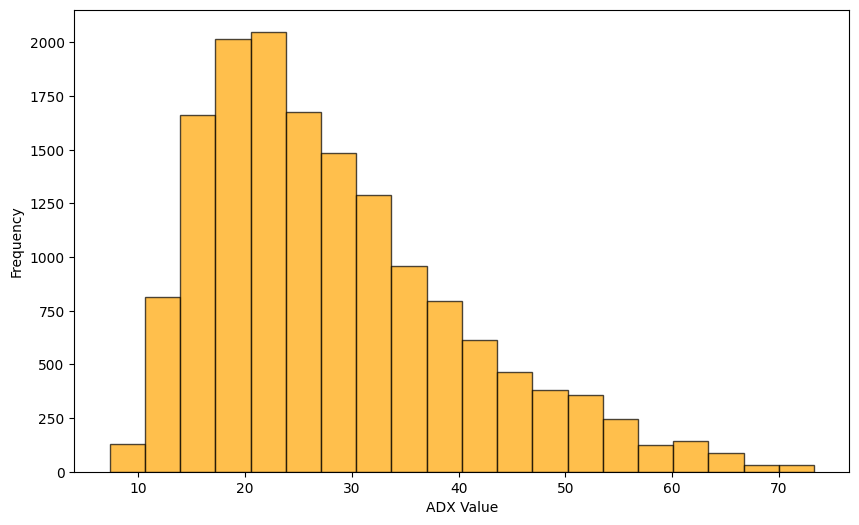

count    15360.000000
mean        28.359192
std         12.004092
min          7.302999
25%         19.347126
50%         25.734117
75%         35.002200
max         73.319819
Name: ADX, dtype: float64


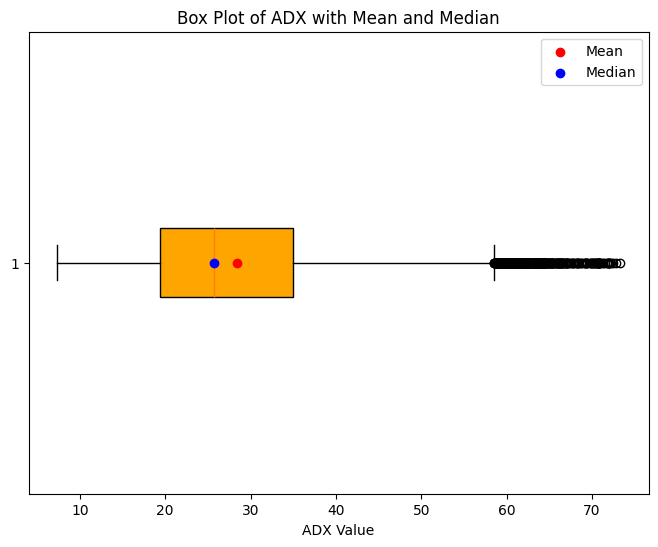

In [4]:
# 查看ADX指标分布 

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.hist(stock_data['ADX'],bins=20,color='orange', alpha=0.7, edgecolor='black')

plt.xlabel('ADX Value')
plt.ylabel('Frequency')

plt.show()


# 假设 stock_data 已经包含了 ADX 列
plt.figure(figsize=(8, 6))

# 绘制箱线图
plt.boxplot(stock_data['ADX'], vert=False, patch_artist=True, boxprops=dict(facecolor='orange', color='black'))

# 计算均值和中位数
mean_value = np.mean(stock_data['ADX'])
median_value = np.median(stock_data['ADX'])

print(stock_data['ADX'].describe())
# 在箱线图中添加均值和中位数的标记
plt.scatter(mean_value, 1, color='red', label='Mean', zorder=5)
plt.scatter(median_value, 1, color='blue', label='Median', zorder=5)

# 添加标题、标签和图例
plt.title('Box Plot of ADX with Mean and Median')
plt.xlabel('ADX Value')
plt.legend()

# 显示图表
plt.show()


EMA144 趋势值统计：
count    15342.000000
mean         0.015385
std          0.117685
min         -0.500000
25%         -0.050000
50%          0.010000
75%          0.080000
max          0.560000
dtype: float64

EMA576 趋势值统计：
count    15342.000000
mean         0.014511
std          0.068008
min         -0.150000
25%         -0.030000
50%          0.010000
75%          0.060000
max          0.340000
dtype: float64


/var/folders/q8/g7095hjx4bsd8j18krjs3l100000gn/T/ipykernel_19898/3340281970.py:110: UserWarning: Glyph 36235 (\N{CJK UNIFIED IDEOGRAPH-8D8B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/q8/g7095hjx4bsd8j18krjs3l100000gn/T/ipykernel_19898/3340281970.py:110: UserWarning: Glyph 21183 (\N{CJK UNIFIED IDEOGRAPH-52BF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/q8/g7095hjx4bsd8j18krjs3l100000gn/T/ipykernel_19898/3340281970.py:110: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/q8/g7095hjx4bsd8j18krjs3l100000gn/T/ipykernel_19898/3340281970.py:110: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/q8/g7095hjx4bsd8j18krjs3l100000gn/T/ipykernel_19898/3340281970.py:110: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/q8

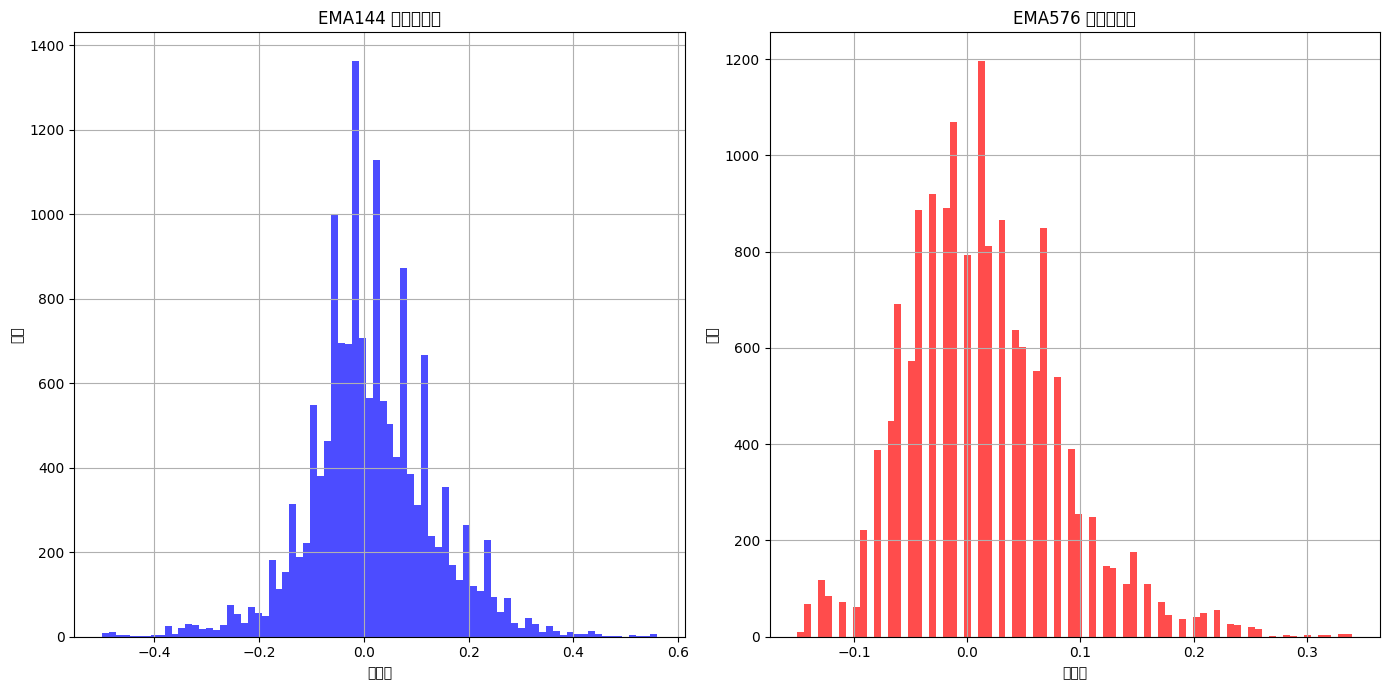

In [5]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
def calculate_percentile_class(data, length=7,trend_history=[]):

    y = np.array(data[-length:])
    # 如果数据不足或包含 NaN，则返回 0
    if len(y) < 2 or np.isnan(y).any():
        return [], 0, 0, 0, 0  # 确保返回 5 个值

    # 创建时间索引（1,2,3,...,length），作为 x 轴
    x = np.arange(len(y))

    # 使用线性回归计算斜率
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # 归一化斜率（防止数值过大）
    trend_value = round(slope / np.mean(y)*100, 2)  # 归一化处理，防止 y 取值过大影响结果
    trend_value = np.clip(trend_value, -1, 1)
    
    # 存储历史 trend_value
    trend_history.append(trend_value)
    trend_status=0
    if(len(trend_history)>=len(stock_data[length:])):
        # 排序
        trend_history_sort=sorted(trend_history);
        q10, q20, q80, q90 = np.percentile(trend_history_sort, [10, 20, 80, 90])
        
        return trend_history,q10, q20, q80, q90
    return trend_history, 0, 0, 0, 0  # 确保总是返回 5 个值

def calculate_trend(data,q10,q20,q80,q90):
    trend_classify=0
    if(data>q90):
        trend_classify=2
    elif q80<=data<=q90:
        trend_classify=1
    elif q10<=data<=q20:
        trend_classify=-1
    elif data<q10:
        trend_classify=-2
    else:
        trend_classify=0
    return data,trend_classify
    
    

# 保存趋势值和状态
trend_values_144 = []
trend_values_576 = []
trend_classifies_144 = []
trend_classifies_576 = []
trend_history_144=[]
trend_history_576=[]
period=18 #天
# 遍历数据并计算每一行的趋势

for i, row in stock_data.iterrows():
    index = stock_data.index.get_loc(i)
    if(index>=period):
        start_index = max(0, index - period)  # 确保不会越界，取从 index 向前推 6 天的数据（总共7天）
        ema_data_144 = stock_data["EMA144"].iloc[start_index:index+1]  # 获取这段数据
        ema_data_576 = stock_data["EMA576"].iloc[start_index:index+1]  # 获取这段数据
        trend_history_144,q10,q20,q80,q90 = calculate_percentile_class(ema_data_144, period,trend_history_144)  # 计算趋势
        trend_history_576,q10_576,q20_576,q80_576,q90_576 = calculate_percentile_class(ema_data_576, period,trend_history_576)  # 计算趋势

for i,row in enumerate(trend_history_144):
    trend_value,trend_classify=calculate_trend(row,q10,q20,q80,q90)
    trend_values_144.append(trend_value)
    trend_classifies_144.append(trend_classify)

for i,row in enumerate(trend_history_576):
    trend_value,trend_classify=calculate_trend(row,q10_576,q20_576,q80_576,q90_576)
    trend_values_576.append(trend_value)
    trend_classifies_576.append(trend_classify)

# trend_classifies_dataframe = pd.DataFrame(trend_classifies_144, columns=['Trend Classify'])
# trend_classifies_dataframe.index = stock_data.index[:len(trend_classifies_576)]
series_144 = pd.Series(trend_values_144)
series_576 = pd.Series(trend_values_576)


# 使用 describe 查看统计信息
print("EMA144 趋势值统计：")
print(series_144.describe())

print("\nEMA576 趋势值统计：")
print(series_576.describe())


plt.figure(figsize=(14,7))
bins_num=80
# 第一个子图：EMA144
plt.subplot(1, 2, 1)
plt.hist(trend_values_144, bins=bins_num, color='blue', alpha=0.7)
plt.title('EMA144 趋势值分布')
plt.xlabel('趋势值')
plt.ylabel('密度')
plt.grid(True)

# 第二个子图：EMA576
plt.subplot(1, 2, 2)
plt.hist(trend_values_576, bins=bins_num, color='red', alpha=0.7)
plt.title('EMA576 趋势值分布')
plt.xlabel('趋势值')
plt.ylabel('密度')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import backtrader as bt
import matplotlib.pyplot as plt
import mplfinance as mpf



# 定义策略 目前制作1D
class EMAStrategy(bt.Strategy):
    params = dict(
        vol_window=7,
    )
    def __init__(self):
          # 手动计算 True Range
        self.tr = bt.indicators.Max(
            self.data.high - self.data.low,
            abs(self.data.high - self.data.close(-1)),
            abs(self.data.low - self.data.close(-1))
        )
        self.atr_1d = bt.indicators.ATR(self.data, period=14, movav=bt.indicators.EMA)  # 这里的 period 是 14 日的ATR
        self.volume_ma_1d = bt.indicators.SimpleMovingAverage(self.data.volume, period=self.params.vol_window)
        self.dmi = bt.indicators.DirectionalMovementIndex(self.data, period=14)  # DMI 指标
        self.di_plus = self.dmi.plusDI  # DI+
        self.di_minus = self.dmi.minusDI  # DI-
        self.obv_ema = bt.indicators.ExponentialMovingAverage(self.data.obv(-1), period=14) #obv mean
        self.adx = self.dmi.adx  # 如果还需要 ADX，可以这样获取
        self.stop_loss = 0  
        self.take_profit = 0  
        self.entry_price = 0
        self.prev_stop_loss = 0   # 记录前一根K线的止损价（用于比较）
        self.prev_take_profit = 0 # 记录前一根K线的止盈价（用于比较）
        self.multiplier_loss=0
        self.multiplier_tp=0
        self.trade_count = 0  #开仓次数
        self.win_list=0
        self.loss_list=0
        self.order_trend_status=0 # 当前仓位的开仓趋势

        # 存储买卖点数据
        self.buy_signals = []   # 记录买点的时间索引
        self.buy_prices = []     # 记录买入价格
        self.sell_signals = []   # 记录卖点的时间索引
        self.sell_prices = []    # 记录卖出价格
        self.close_signals = []    # 记录平仓时间索引
        self.close_prices_tp = []    # 记录平仓价格 赚
        self.close_prices_sl = []    # 记录平仓价格 亏
        self.close_signals_tp=[]
        self.close_signals_sl=[]
        
        #记录指标
        self.trade_data=[] #记录开仓的各种数据
        self.trade_all_data=[] # 记录所有遍历的数据
        
        

    def notify_order(self, order):
      
        if order.status in [order.Canceled]:
            print(f'订单已取消')
        elif order.status in [order.Margin]:
            print(f'保证金不足')
        elif order.status in [order.Rejected]:
            print(f'订单被拒绝')

    def notify_trade(self, trade):
        if trade.justopened:
            # 记录开仓时间（Backtrader 的 `datetime` 需要转换）
            
            open_time = self.data.datetime.datetime(0)
            self.trade_count += 1  # 记录开仓次数
            
            if trade.size > 0:  # 多单
                self.buy_signals.append(open_time)
                self.buy_prices.append(self.data.close[0])  # 记录买入多单价
            else:
                self.sell_signals.append(open_time)
                self.sell_prices.append(self.data.close[0])  # 记录买入空单价 
            # 记录开仓时的特征
            trade_data = {
                'open_time': open_time,
                'open_price': self.data.close[0],  # 当前的收盘价作为开仓价格
                'atr': self.atr_1d[0],
                'rsi': self.data.rsi[0],
                'ema_13': self.data.ema_13[0],
                'ema_34': self.data.ema_34[0],
                'ema_144': self.data.ema_144[0],
                'ema_169': self.data.ema_169[0],
                'ema_576': self.data.ema_576[0],
                'ema_676': self.data.ema_676[0],
                'volume': self.data.volume[0],
                'volume_ma': self.volume_ma_1d[0],
                'direction': 1 if trade.size > 0 else 2,
                'trade_size': abs(trade.size),
                'open_hold_total_price': round(self.data.close[0] * abs(trade.size), 4),
                'adx':self.adx[0],
                "di_plus":self.di_plus[0],
                "di_minus":self.di_minus[0],
                "pnl":0,
                "obv":self.data.obv[0],
                "open_order_trend_status":self.order_trend_status,
                "macd":self.data.macd[0]
            }
            self.trade_data.append(trade_data)
                
            print(f'开仓时间: {open_time}, 开仓代码调试：{self.order_trend_status},方向: {"多" if trade.size > 0 else "空"},数量: {abs(trade.size)},价格: {self.data.close[0]},ATR:{self.atr_1d[0]},OBV_OSC:{self.data.obv[0] - self.obv_ema[0]}')
    
        elif trade.isclosed:
            # 记录平仓时间
            close_time = self.data.datetime.datetime(0)
            if(trade.pnl>0):
                self.win_list+=1
                self.close_prices_tp.append(self.data.close[0])  # 记录买入空单价 赚
                self.close_signals_tp.append(close_time)
            else:
                self.loss_list+=1
                self.close_prices_sl.append(self.data.close[0])  # 记录买入空单价 亏  
                self.close_signals_sl.append(close_time)
                
            self.close_signals.append(close_time)
                 # 找到对应的开仓记录并更新 PNL
            for t in self.trade_data:
                if t["pnl"] == 0:  # 只更新未结算的交易
                    t["pnl"] = trade.pnl
                    t["close_time"] = close_time
                    t["close_price"] = self.data.close[0]
            print(f'平仓时间: {close_time},平仓代码调试：{self.order_trend_status}, 盈亏: {trade.pnl:.2f},价格: {self.data.close[0]}, 数量: {abs(trade.size)},RSI:{self.data.rsi[0]}',)
            print(f'开仓数:{self.trade_count} ｜ 盈利单：{self.win_list} ｜亏损单：{self.loss_list}，胜率：{self.win_list/(self.trade_count+0.0001):.2%}')
            print(f"数据时间周期: {self.data._timeframe}")  # 看看是分钟、小时还是日线
            print("-----------------------------------")


    def calculate_ema_trend(self,ema_line, length=5):
        y = ema_line.get(size=length)
        x = np.arange(len(y))
        # 使用线性回归计算斜率
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        # 归一化斜率（防止数值过大）
        trend_value = round(slope / np.mean(y)*100, 2)  # 归一化处理，防止 y 取值过大影响结果


        return trend_value


    def get_stop_loss_multiplier(self, slope_1d_144):
        """ 计算止损 ATR 乘数 """

        # if(self.position.size>0):
        #     if(self.data.close[0]<self.data.ema_13[0]):
        #         return 2
           
        # elif(self.position.size<0):
        #     if(self.data.close[0]>self.data.ema_13[0]):
        #         return 2
       
        # return 1.5
    
        
        return 2
    

    def get_take_profit_multiplier(self, slope_1d_144):
        """ 计算止盈 ATR 乘数 """
        print(f"tp：{self.take_profit} vs 当前价格：{self.data.close[0]}，RSI：{self.data.rsi[0]} 时间：{self.data.datetime.datetime(0)}")
        print(f"sl：{self.stop_loss} vs 当前价格：{self.data.close[0]}，RSI：{self.data.rsi[0]} 时间：{self.data.datetime.datetime(0)}")
        if self.data.rsi[0]>80 or self.data.rsi[0]<20:
            return 2.5
        # elif self.position.size>0:
        #      if(self.data.close[0]<self.data.ema_34[0]):
        #          return 2
        # elif self.position.size<0:
        #      if(self.data.close[0]>self.data.ema_34[0]):
        #          return 2
         
         # # else:
        return None  # 没有止损
    
    def get_state(self):
        """获取当前交易状态"""
            # 记录开仓时的特征
        trade_data = {
            'open_price': self.data.close[0],  # 当前的收盘价作为开仓价格
            'atr': self.atr_1d[0],
            'rsi': self.data.rsi[0],
            'ema_13': self.data.ema_13[0],
            'ema_34': self.data.ema_34[0],
            'ema_144': self.data.ema_144[0],
            'ema_169': self.data.ema_169[0],
            'volume': self.data.volume[0],
            'volume_ma': self.volume_ma_1d[0],
            'position_status': 1 if self.position.size > 0 else (2 if self.position.size < 0 else 0),
            'trade_size': abs(self.position.size),
            "order_trend_status":self.order_trend_status,
            'adx':self.adx[0],
            "di_plus":self.di_plus[0],
            "di_minus":self.di_minus[0],
            'macd':self.data.macd[0],
        }
        self.trade_all_data.append(trade_data)
  
    def next(self):
        period_1d = 18  # 用过去 1d 7根K线数据计算趋势
        self.slope_1d_144 = self.calculate_ema_trend(self.data.ema_144,length=period_1d)

        self.slope_1d_576 = self.calculate_ema_trend(self.data.ema_576,length=period_1d)

        # series_144 = pd.Series(trend_values_144)
        # series_576 = pd.Series(trend_values_576)
        close_price_1d = self.data.close[0]
        ema_13_1d = self.data.ema_13[0]
        ema_34_1d = self.data.ema_34[0]
        ema_144_1d = self.data.ema_144[0]
        ema_169_1d= self.data.ema_169[0]
        ema_576_1d= self.data.ema_576[0]
        ema_676_1d= self.data.ema_676[0]
        volume_1d= self.data.volume[0]
        volume_ma_1d = self.volume_ma_1d[0]
        atr_1d= self.atr_1d[0]
        multiplier_loss= self.multiplier_loss
        multiplier_tp= self.multiplier_tp
        rsi_1d= self.data.rsi[0]
        obv_osc=self.data.obv[0] - self.obv_ema[0]
        
        stop_loss_base=0 
        # 根据均值和标准差动态设置阈值
        
        # 策略
        cash = self.broker.get_cash()  # 获取当前账户现金
        leverage = 1  # 假设杠杆 1 倍
        if self.position.size == 0:  # 无持 仓
            if(self.slope_1d_144>0 and  self.slope_1d_576 >0 and self.slope_1d_144>=self.slope_1d_576):
                if close_price_1d> ema_13_1d and self.data.macd[0]>0:
                    print("poor long")
                    target_cash = cash * 0.6  # 0.6 仓位
                    max_position_value = target_cash * leverage  # 计算最大可持仓金额
                    size = max_position_value / close_price_1d  # 计算买入数量
                    self.buy(size=size)
                    self.entry_price = close_price_1d
            elif(self.slope_1d_144 < 0 and  self.slope_1d_576 < 0 and self.slope_1d_144<=self.slope_1d_576):
                if close_price_1d < ema_13_1d and self.data.macd[0]<0 :
                    print("poor short")
                    target_cash = cash * 0.6  # 60% 仓位
                    max_position_value = target_cash * leverage  # 计算最大可持仓金额
                    size = max_position_value / close_price_1d  # 计算买入数量
                    self.sell(size=size)
                    self.entry_price = close_price_1d
             

        elif self.position.size > 0:
            # 根据 1D 趋势选择止损 & 止盈的 ATR 乘数
            multiplier_loss = self.get_stop_loss_multiplier(self.slope_1d_144) 
            multiplier_tp = self.get_take_profit_multiplier(self.slope_1d_144) 
 
            if(multiplier_tp is not None):
                if(self.take_profit==0):
                    self.take_profit=self.entry_price + atr_1d *1.5
                new_take_profit =max(self.take_profit, close_price_1d + atr_1d * multiplier_tp)
                self.take_profit = new_take_profit
            if(multiplier_loss is not None):
                if(self.stop_loss==0):
                    self.stop_loss=self.entry_price-atr_1d *1.5
                 # 计算新的止损价，并确保止损价只向上调整
                if self.data.close[0] > self.entry_price + 1.5 * atr_1d:
                    stop_loss_base =self.data.close[0]
                    print(f"havr stop_loss_base: {stop_loss_base}")

                if stop_loss_base != 0:
                    self.stop_loss = max(self.stop_loss, stop_loss_base)
                else:
                    self.stop_loss = max(self.stop_loss, close_price_1d - atr_1d * multiplier_loss)

            # 触发止盈
            if self.take_profit and close_price_1d >= self.take_profit :
                print("触发止盈")
                self.close()
                self.take_profit = 0  # 归零止盈，重新计算
                self.stop_loss = 0  # 避免后续误触止损
                self.order_trend_status=self.slope_1d_144
            # 触发止损
            elif self.stop_loss and close_price_1d < self.stop_loss:
                self.close()
                self.stop_loss = 0  # 归零止损，重新计算
                self.take_profit = 0  # 避免后续误触止盈
                self.order_trend_status=self.slope_1d_144


        elif self.position.size < 0:
            # 根据 1D 趋势选择止损 & 止盈的 ATR 乘数
            multiplier_loss = self.get_stop_loss_multiplier(self.slope_1d_144) 
            multiplier_tp = self.get_take_profit_multiplier(self.slope_1d_144) 
            # 计算新的止盈价，并确保止盈价只向下调整
            if(multiplier_tp is not None):
                if(self.take_profit==0):
                    self.take_profit=self.entry_price-atr_1d *1.5
                self.take_profit =min(self.take_profit,close_price_1d - atr_1d * multiplier_tp)

            # 计算新的止损价，并确保止损价只向下调整
           
            if(multiplier_loss is not None):
                if(self.stop_loss==0):
                    self.stop_loss=self.entry_price + atr_1d*1.5
                # 计算新的止损价，并确保止损价只向下调整（空单）
                if self.data.close[0] < self.entry_price - 1.5 * atr_1d:
                    stop_loss_base = self.data.close[0]
                # 确保
                if stop_loss_base != 0:
                    self.stop_loss = min(self.stop_loss, stop_loss_base)
                else:
                    self.stop_loss = min(self.stop_loss, close_price_1d + atr_1d * multiplier_loss)
                
            # 触发止盈
            if  self.take_profit and close_price_1d <= self.take_profit:
                print("触发止盈")
                self.close()
                self.take_profit = 0  # 归零止盈，重新计算
                self.stop_loss = 0  # 避免后续误触止损
                self.order_trend_status=self.slope_1d_144
            # 触发止损
            elif self.stop_loss and close_price_1d > self.stop_loss :
                print("触发止损")
                self.close()
                self.stop_loss = 0  # 归零止损，重新计算
                self.take_profit = 0  # 避免后续误触止盈
                self.order_trend_status=self.slope_1d_144
        
        self.get_state()
      


cerebro=bt.Cerebro()


# 确保 `stock_data` 的索引是日期
stock_data.index = pd.to_datetime(stock_data.index)

# # 获取最近 40 年数据
# end_date = stock_data.index.max()
# start_date = end_date - pd.DateOffset(years=40)
# filtered_stock_data = stock_data.loc[start_date:end_date]


data_1d = CustomPandasData(
    dataname=stock_data,
    datetime=None,
    timeframe=bt.TimeFrame.Days,
)

# 加载数据
cerebro.adddata(data_1d)

# 加载策略
cerebro.addstrategy(EMAStrategy)

# 分析器
cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')

# 设置初始资本
cerebro.broker.set_cash(10000)


# 运行回测
results = cerebro.run()

strategy = results[0]  # 获取策略对象

# 打印核心数据
final_position = strategy.getposition(strategy.datas[0])
final_position_size = final_position.size
final_position_avg_price = final_position.price if final_position_size != 0 else 0  # 只有当有持仓时才取均价

# 获取初始资金和最终资金
initial_cash = cerebro.broker.startingcash
final_cash = cerebro.broker.get_value()

# 获取初始日期和结束日期
start_date = strategy.datas[0].datetime.date(-len(strategy.datas[0])+1) # 初始日期
end_date = strategy.datas[0].datetime.date(0)   # 结束日期

print(start_date,end_date,'end_dateend_dateend_date')

# 计算总天数
total_days = (end_date - start_date).days

# 计算交易年数
years = total_days / 365.0

# 计算年化收益率
annualized_return = (final_cash / initial_cash) ** (1 / years) - 1


    # "最终持仓": final_position_size,

print({
    "初始资金": cerebro.broker.startingcash,
    "最终资金": cerebro.broker.get_value(),
    "累计收益率": (cerebro.broker.get_value() - cerebro.broker.startingcash) / cerebro.broker.startingcash * 100,
    "年化收益率": annualized_return * 100
})

drawdown = results[0].analyzers.drawdown.get_analysis()
print(f"最大回撤比例: {drawdown.max.drawdown:.2f}%")
print(f"最大回撤金额: {drawdown.max.moneydown:.2f}")
print(f"最大回撤持续时间: {drawdown.max.len/4:.2f} h ")



poor long
开仓时间: 2018-05-05 20:00:00, 开仓代码调试：0,方向: 多,数量: 0.60790273556231,价格: 9864.0,ATR:159.3193234594457,OBV_OSC:5892.040121366503
tp：0 vs 当前价格：9864.0，RSI：64.96596629011778 时间：2018-05-05 20:00:00
sl：0 vs 当前价格：9864.0，RSI：64.96596629011778 时间：2018-05-05 20:00:00
触发止盈
平仓时间: 2018-05-06 00:00:00,平仓代码调试：0.15, 盈亏: -1.85,价格: 9895.99, 数量: 0.0,RSI:66.08636872353463
开仓数:1 ｜ 盈利单：0 ｜亏损单：1，胜率：0.00%
数据时间周期: 5
-----------------------------------
poor long
开仓时间: 2018-05-06 04:00:00, 开仓代码调试：0.15,方向: 多,数量: 0.6061937752558278,价格: 9724.0,ATR:180.31762517620592,OBV_OSC:128.0115502042172
tp：0 vs 当前价格：9724.0，RSI：55.761350573533576 时间：2018-05-06 04:00:00
sl：0 vs 当前价格：9724.0，RSI：55.761350573533576 时间：2018-05-06 04:00:00
触发止盈
平仓时间: 2018-05-06 08:00:00,平仓代码调试：0.15, 盈亏: -104.55,价格: 9539.94, 数量: 0.0,RSI:47.25293609327682
开仓数:2 ｜ 盈利单：0 ｜亏损单：2，胜率：0.00%
数据时间周期: 5
-----------------------------------
poor short
开仓时间: 2018-05-12 12:00:00, 开仓代码调试：0.15,方向: 空,数量: 0.6964035037157229,价格: 8313.13,ATR:251.19895500282257,OBV_OS

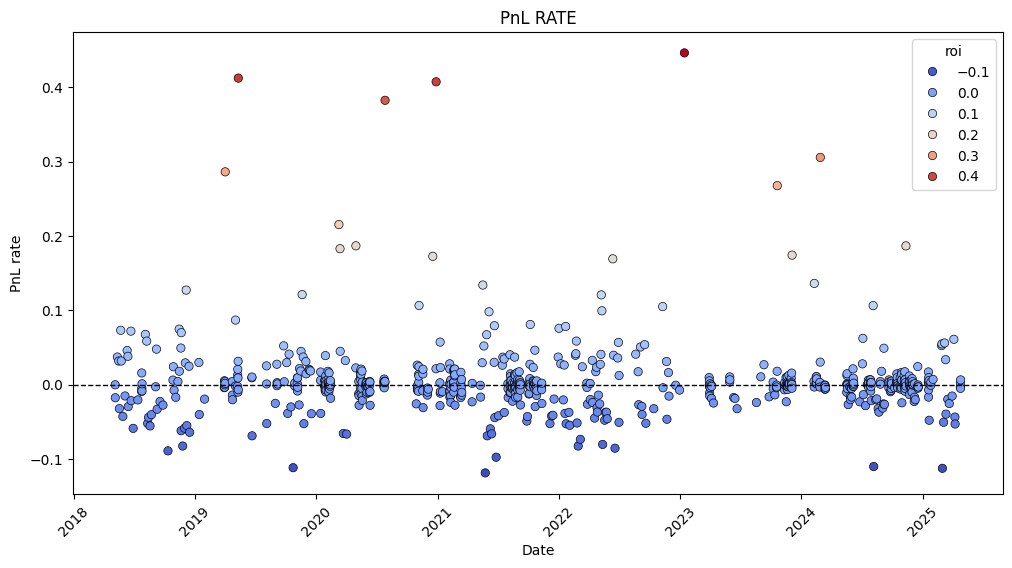

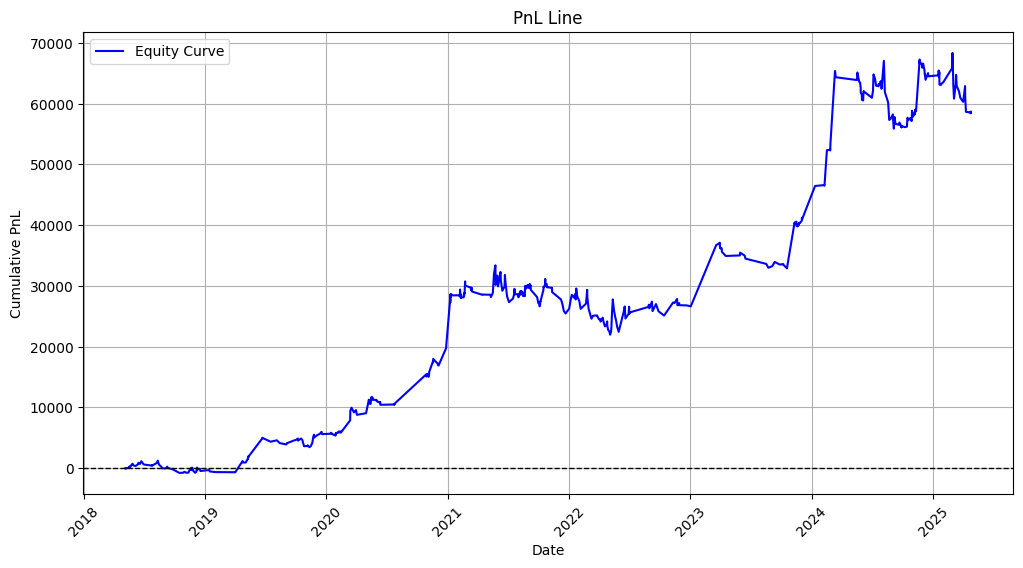

              open_time          close_time       roi  open_price  close_price
273 2021-05-24 04:00:00 2021-05-24 20:00:00 -0.118855    36645.79     38796.29
667 2025-02-28 16:00:00 2025-03-02 20:00:00 -0.112693    84449.99     94270.00
91  2019-10-23 16:00:00 2019-10-25 16:00:00 -0.111854     7482.90      8634.87
567 2024-08-05 20:00:00 2024-08-08 16:00:00 -0.110294    54018.81     59414.51
282 2021-06-26 00:00:00 2021-06-28 00:00:00 -0.097768    31977.59     34398.36
32  2018-10-11 20:00:00 2018-10-15 08:00:00 -0.089184     6252.68      6982.28
418 2022-06-18 20:00:00 2022-06-19 12:00:00 -0.085652    18970.79     19824.97
390 2022-02-28 00:00:00 2022-02-28 16:00:00 -0.082709    37793.80     41329.44
43  2018-11-25 04:00:00 2018-11-26 00:00:00 -0.082697     3866.78      4118.98
411 2022-05-12 16:00:00 2022-05-16 00:00:00 -0.080570    28641.15     30323.23
              open_time          close_time       roi  open_price  close_price
440 2023-01-13 20:00:00 2023-03-19 20:00:00  0.44615

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mticker
df = pd.DataFrame(strategy.trade_data)

df["roi"] = df["pnl"] / (df["open_price"] * abs(df['trade_size']))

# 绘制散点图
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=df['open_time'], 
    y=df['roi'], 
    hue=df['roi'], 
    palette='coolwarm', 
    edgecolor='black'
)

# 添加基线
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# 设置标签和标题
plt.xlabel("Date")
plt.ylabel("PnL rate")
plt.title("PnL RATE")
plt.xticks(rotation=45)
plt.show()


trade_data=strategy.trade_data
trade_data = pd.DataFrame(trade_data)
# 假设 trade_data 是 DataFrame
order_status_values = [2, -2, -1, 1, 0]

# 统计不同 order_trend_status 下亏损的单数
loss_counts = trade_data[trade_data["pnl"] < 0].groupby("open_order_trend_status").size()
tp_counts = trade_data[trade_data["pnl"] > 0].groupby("open_order_trend_status").size()


# 读取交易数据
trade_data = pd.DataFrame(strategy.trade_data)

# 计算累计收益
trade_data["cumulative_pnl"] = trade_data["pnl"].cumsum()

# 绘制持仓曲线
plt.figure(figsize=(12, 6))
plt.plot(trade_data["close_time"], trade_data["cumulative_pnl"], label="Equity Curve", color="blue")

# 添加零基准线
plt.axhline(0, color='black', linestyle='--', linewidth=1)

# 设置标题和标签
plt.title("PnL Line")
plt.xlabel("Date")
plt.ylabel("Cumulative PnL")
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter())  # 关闭科学计数法
plt.ticklabel_format(style='plain', axis='y')  # 强制使用普通数字显示
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# 显示图表
plt.show()







# 打印亏损率最高的前 20 条交易
print(df.nsmallest(10, 'roi')[['open_time', 'close_time','roi','open_price','close_price']])
print(df.nlargest(10, 'roi')[['open_time', 'close_time','roi','open_price','close_price']])






/var/folders/q8/g7095hjx4bsd8j18krjs3l100000gn/T/ipykernel_19898/1902624534.py:56: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  trade_data["cumulative_pnl"]


[datetime.datetime(2018, 5, 5, 20, 0), datetime.datetime(2018, 5, 6, 4, 0), datetime.datetime(2018, 7, 24, 12, 0), datetime.datetime(2018, 7, 24, 20, 0), datetime.datetime(2018, 7, 25, 4, 0), datetime.datetime(2018, 7, 25, 12, 0), datetime.datetime(2018, 7, 25, 20, 0), datetime.datetime(2018, 9, 4, 16, 0), datetime.datetime(2019, 3, 30, 12, 0), datetime.datetime(2019, 3, 30, 20, 0), datetime.datetime(2019, 3, 31, 4, 0), datetime.datetime(2019, 3, 31, 12, 0), datetime.datetime(2019, 4, 1, 4, 0), datetime.datetime(2019, 4, 1, 12, 0), datetime.datetime(2019, 4, 1, 20, 0), datetime.datetime(2019, 4, 2, 4, 0), datetime.datetime(2019, 4, 23, 12, 0), datetime.datetime(2019, 4, 23, 20, 0), datetime.datetime(2019, 4, 24, 4, 0), datetime.datetime(2019, 5, 2, 20, 0), datetime.datetime(2019, 5, 3, 4, 0), datetime.datetime(2019, 5, 9, 8, 0), datetime.datetime(2019, 5, 9, 16, 0), datetime.datetime(2019, 5, 10, 0, 0), datetime.datetime(2019, 5, 10, 8, 0), datetime.datetime(2019, 5, 10, 16, 0), dateti

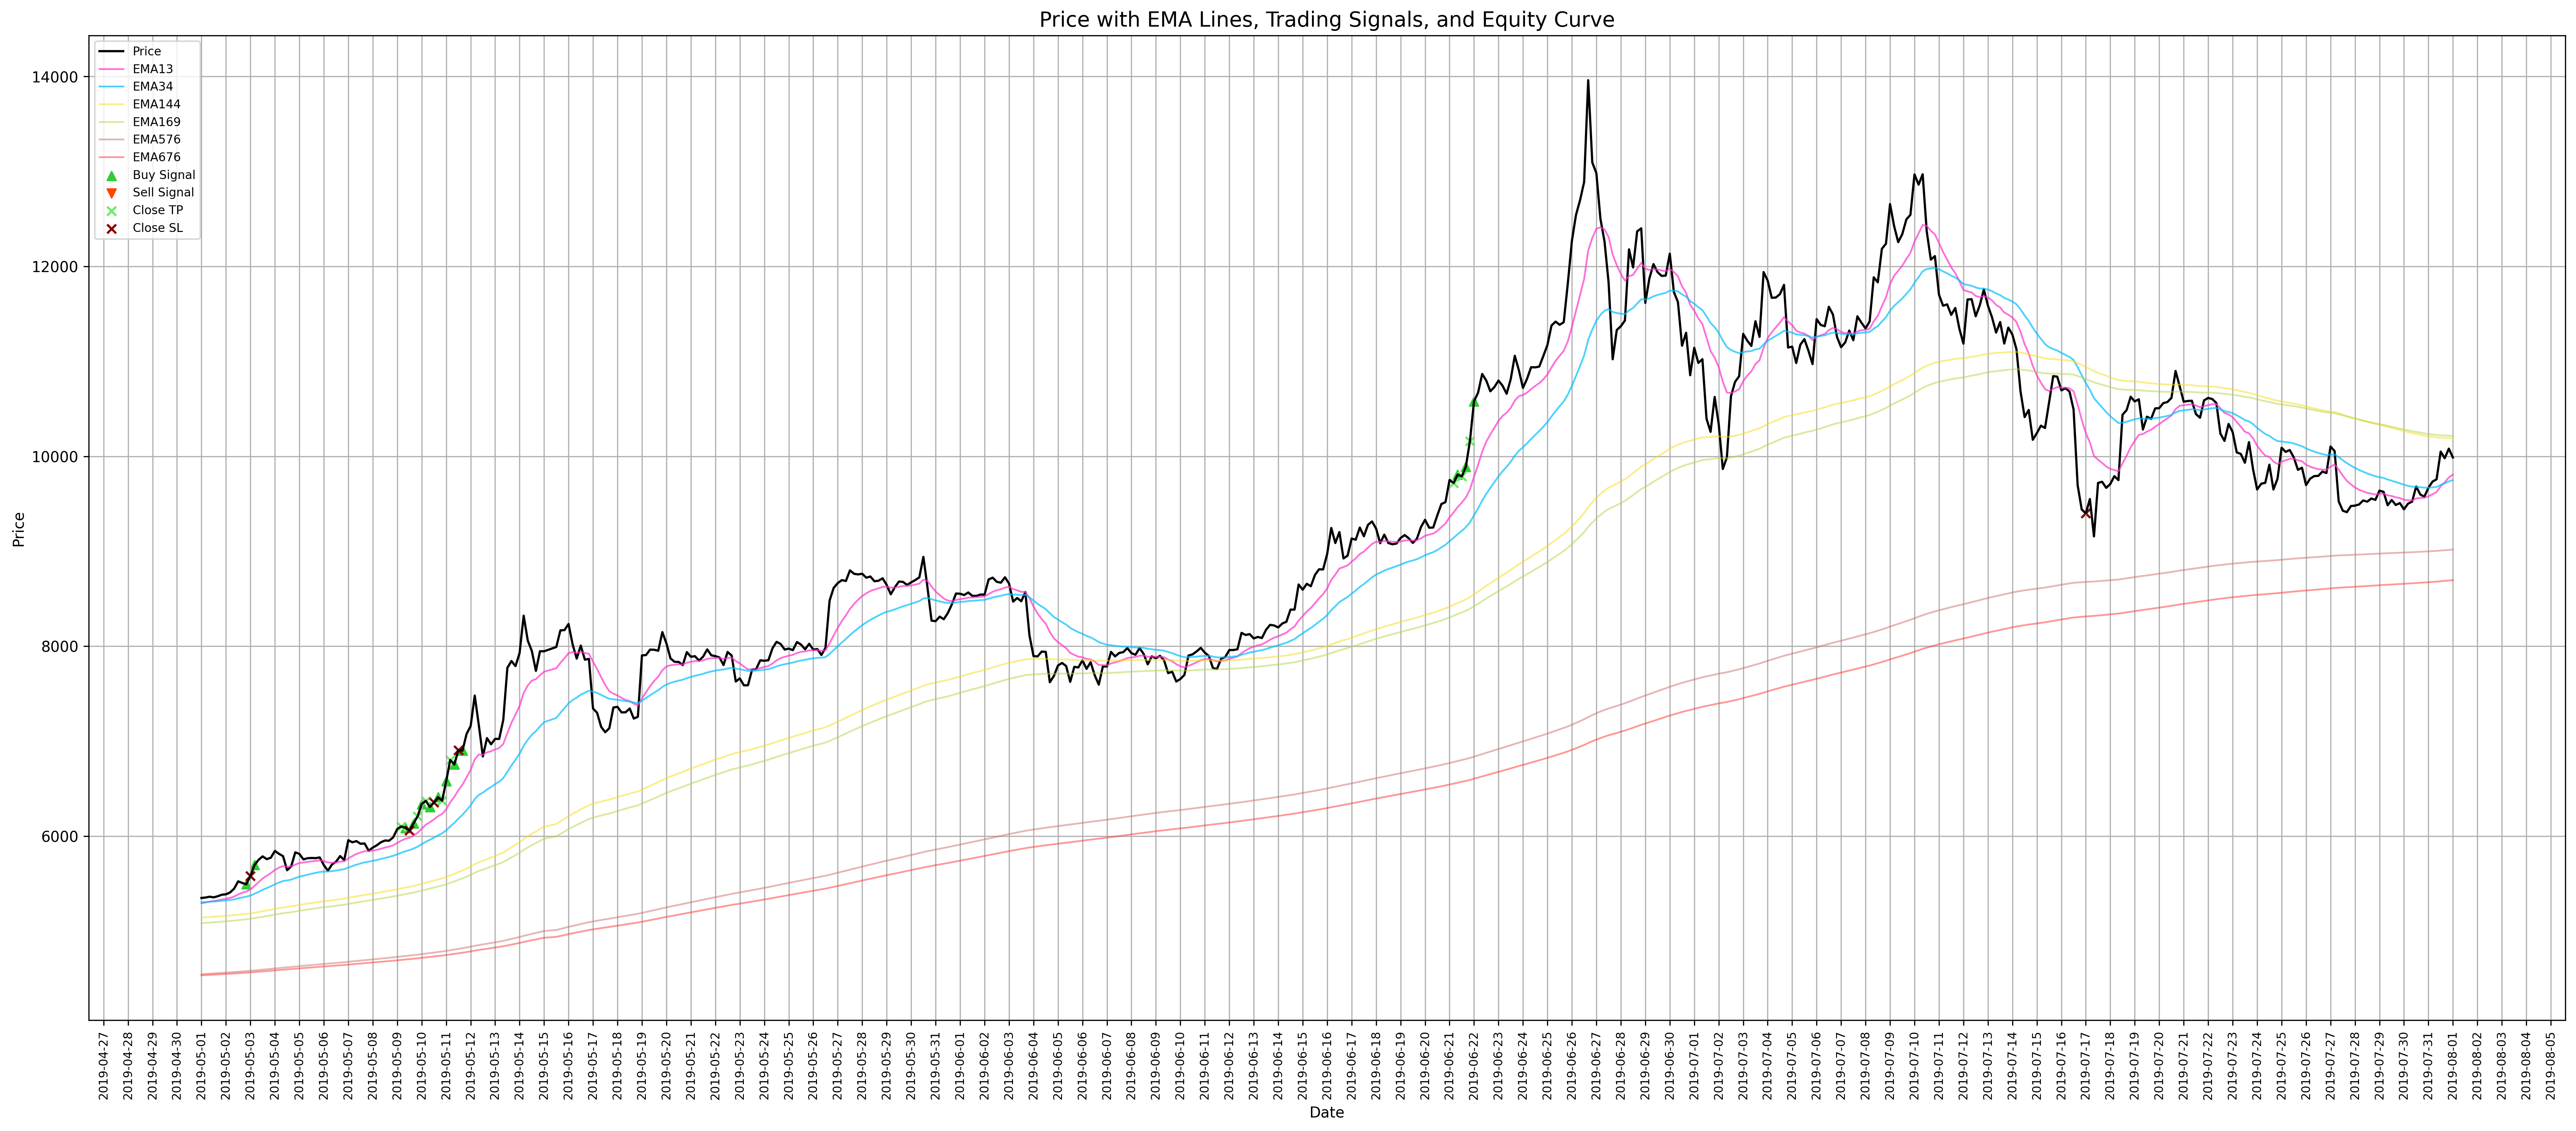

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
# 确保 datetime 相关库导入
from datetime import datetime

# 获取价格和时间数据
data = strategy.data
dates = [bt.num2date(d) for d in data.datetime.array]  # 转换为 datetime 格式

volumes = data.volume.array
prices = data.close.array

# 获取信号数据（转换为 datetime 格式）
buy_times = strategy.buy_signals
sell_times =  strategy.sell_signals
close_times_tp = strategy.close_signals_tp
close_times_sl = strategy.close_signals_sl

# 获取 EMA 数据
ema13 = data.ema_13.array
ema34 = data.ema_34.array
ema144 = data.ema_144.array
ema169 = data.ema_169.array
ema576 = data.ema_576.array
ema676 = data.ema_676.array

# 创建 DataFrame
df = pd.DataFrame({
    'datetime': dates,
    'price': prices,
    'volume': volumes,
    'ema13': ema13,
    'ema34': ema34,
    'ema144': ema144,
    'ema169': ema169,
    'ema576': ema576,
    'ema676': ema676
})

# 设置筛选时间范围
start_date = datetime(2019, 5, 1)
end_date = datetime(2019, 8,1)

# 读取交易数据
trade_data = pd.DataFrame(strategy.trade_data)
# 计算累计收益
trade_data["cumulative_pnl"] = trade_data["pnl"].cumsum()

trade_data["open_time"] = pd.to_datetime(trade_data["open_time"])
trade_data=trade_data.set_index('open_time')
# ✅ 用 close_time 作为 index
df=df.set_index('datetime')
# 3. 对齐 cumulative_pnl 到主图时间轴
df["cumulative_pnl"] = (
    trade_data["cumulative_pnl"]
    .reindex(df.index)
    .fillna(method="ffill")
    .fillna(0)
)



# print(df)

# time_axis["cumulative_pnl"] = time_axis["cumulative_pnl"].fillna(method='ffill')

# time_axis["cumulative_pnl"] = time_axis["cumulative_pnl"].fillna(method='ffill')

# 计算完整的cumulative_pnl





# # 过滤时间范围内的数据
df_filtered = df[(df.index >= start_date) & (df.index<= end_date)]
trade_data= trade_data[(trade_data.index >= start_date) & (trade_data.index<= end_date)]



# 获取筛选后的数据
dates_filtered = df_filtered.index.tolist()

prices_filtered = df_filtered['price'].tolist()
volumes_filtered = df_filtered['volume'].tolist()


ema13_filtered = df_filtered['ema13'].tolist()
ema34_filtered = df_filtered['ema34'].tolist()
ema144_filtered = df_filtered['ema144'].tolist()
ema169_filtered = df_filtered['ema169'].tolist()
ema576_filtered = df_filtered['ema576'].tolist()
ema676_filtered = df_filtered['ema676'].tolist()


print(buy_times)
# 过滤买入、卖出和平仓信号
buy_times_filtered = [t for t in buy_times if start_date <= t <= end_date]
sell_times_filtered = [t for t in sell_times if start_date <= t <= end_date]
close_times_tp_filtered = [t for t in close_times_tp if start_date <= t <= end_date]
close_times_sl_filtered = [t for t in close_times_sl if start_date <= t <= end_date]

print(buy_times_filtered)

# 过滤对应的价格数据
# 3️⃣ **用 `prices_filtered` 获取信号对应的价格**
buy_prices_filtered = [prices_filtered[dates_filtered.index(d)] for d in buy_times_filtered]
sell_prices_filtered = [prices_filtered[dates_filtered.index(d)] for d in sell_times_filtered]
close_prices_tp_filtered = [prices_filtered[dates_filtered.index(d)] for d in close_times_tp_filtered]
close_prices_sl_filtered = [prices_filtered[dates_filtered.index(d)] for d in close_times_sl_filtered]


# 画图
fig, ax = plt.subplots(figsize=(30, 12), dpi=300)
ax.plot(dates_filtered, prices_filtered, label="Price", color='black', linewidth=1.5)
# 绘制 EMA 线
ax.plot(dates_filtered, ema13_filtered, label="EMA13", color='#ff33cc', linestyle='solid', linewidth=1.2, alpha=0.7)
ax.plot(dates_filtered, ema34_filtered, label="EMA34", color='#00BFFF', linestyle='solid', linewidth=1.2, alpha=0.7)
ax.plot(dates_filtered, ema144_filtered, label="EMA144", color='#f7dc16', linestyle='solid', linewidth=1.2, alpha=0.5)
ax.plot(dates_filtered, ema169_filtered, label="EMA169", color='#b5d542', linestyle='solid', linewidth=1.2, alpha=0.5)
ax.plot(dates_filtered, ema576_filtered, label="EMA576", color='#cf6c6c', linestyle='solid', linewidth=1.2, alpha=0.5)
ax.plot(dates_filtered, ema676_filtered, label="EMA676", color='#ff3333', linestyle='solid', linewidth=1.2, alpha=0.5)

# 绘制买卖信号
ax.scatter(buy_times_filtered, buy_prices_filtered, marker='^', color='#32CD32', label="Buy Signal")
ax.scatter(sell_times_filtered, sell_prices_filtered, marker='v', color='#FF4500', label="Sell Signal")

# 绘制止盈和止损信号
ax.scatter(close_times_tp_filtered, close_prices_tp_filtered, marker='x', color='#68ec68', linewidth=1.5, label="Close TP")
ax.scatter(close_times_sl_filtered, close_prices_sl_filtered, marker='x', color='#8B0000', linewidth=1.5, label="Close SL")

# 格式化日期
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=80, maxticks=120))
plt.xticks(rotation=90, fontsize=8)
# fig.autofmt_xdate()

# 设置标题和标签
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
ax.grid(True)




# 格式化图例和网格
ax.legend(loc='upper left', fontsize=8)
ax.grid(True)


plt.title('Price with EMA Lines, Trading Signals, and Equity Curve', fontsize=14)
plt.show()


In [9]:
# 强化学习
import gym
import random



trade_data=strategy.trade_data

trade_data = pd.DataFrame(trade_data)


class TradingEnv(gym.Env):
    def __init__(self, data):
        super(TradingEnv, self).__init__()
        self.data = trade_data
        self.current_step = 0
        # 动作空间：0 = Hold, 1 = Buy, 2 = Sell



roi_category
1    75
0    60
Name: count, dtype: int64
roi_category
1    0.555556
0    0.444444
Name: proportion, dtype: float64
原始训练集大小: (108, 5)
过采样后训练集大小: (110, 5)
              precision    recall  f1-score   support

           0     0.3077    0.5714    0.4000         7
           1     0.7857    0.5500    0.6471        20

    accuracy                         0.5556        27
   macro avg     0.5467    0.5607    0.5235        27
weighted avg     0.6618    0.5556    0.5830        27



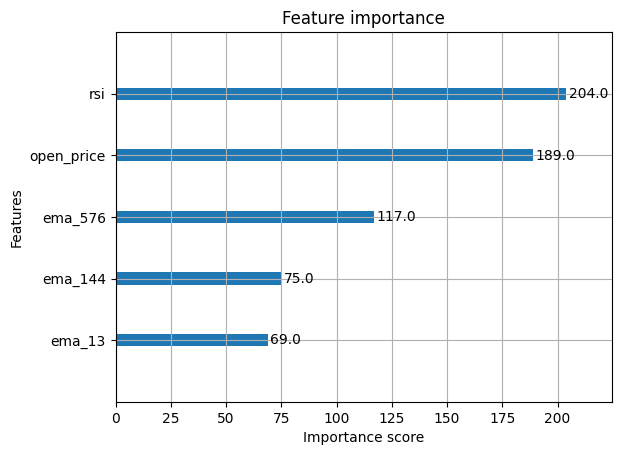

In [10]:
'''
Description: 
Author: 
Date: 2025-04-01 09:06:35
LastEditTime: 2025-04-02 15:21:12
LastEditors: dengxiang(dengxiang@cpgroup.cn)
'''
# from imblearn.over_sampling import SMOTE

# from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_recall_fscore_support,classification_report


trade_data=strategy.trade_data

# trade_all_data=strategy.trade_all_data

trade_data = pd.DataFrame(trade_data)

trade_data["volume_status"] = np.where(trade_data["volume"] > trade_data['volume_ma'], 1, 2)
trade_data["ema_s_status"] = np.where(trade_data["ema_13"] > trade_data['ema_34'], 1, 2)
trade_data["ema_sm_status"] = np.where(trade_data["ema_34"] > trade_data['ema_144'], 1, 2)
trade_data["ema_m_status"] = np.where(trade_data["ema_144"] > trade_data['ema_169'], 1, 2)


def classify_roi(roi):

    if roi <0:
        return 0 # 频繁止损
    else:
        return 1#
    # if(roi) <0:
    #     return 0
    # else:
    #     return 1

# 利润率
trade_data["roi"] = (trade_data["close_price"] - trade_data["open_price"]) / trade_data["open_price"]

# 分类
trade_data["roi_category"] = trade_data["roi"].apply(classify_roi)

print(trade_data["roi_category"].value_counts())
print(trade_data["roi_category"].value_counts(normalize=True))
# 选择特征

# X = trade_data[['adx','rsi','ema_34','ema_13','ema_144','ema_169',"di_plus",'di_minus','volume_status','atr','ema_s_status','ema_sm_status','ema_m_status','ema_576','ema_676']]
X = trade_data[['open_price','ema_13','ema_144','ema_576','rsi']]


y = trade_data["roi_category"]



# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 对训练集应用SMOTE
smote = SMOTE(random_state=42,sampling_strategy=1.0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 看看处理后的样本数量
print(f"原始训练集大小: {X_train.shape}")
print(f"过采样后训练集大小: {X_train_resampled.shape}")

model = xgb.XGBClassifier().fit(X_train, y_train)
xgb.plot_importance(model)


# # 应用 SMOTE 过采样
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# # 检查过采样后的数据分布
# print("过采样后训练集类别分布：")
# print(pd.Series(y_train_resampled).value_counts())

# 训练 XGBoost 模型a z
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=5)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估
print(classification_report(y_test, y_pred,digits=4))


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np




# 数据集拆分（80% 训练，20% 测试）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **只使用分类模型**
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

# 评估
print(classification_report(y_test, y_pred,digits=4))

# importances = rf_clf.feature_importances_
# feature_names = X.columns
# feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
# feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
# print(feature_importance_df)

              precision    recall  f1-score   support

           0     0.1667    0.2857    0.2105         7
           1     0.6667    0.5000    0.5714        20

    accuracy                         0.4444        27
   macro avg     0.4167    0.3929    0.3910        27
weighted avg     0.5370    0.4444    0.4779        27



In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

# 数据集拆分（80% 训练，20% 测试）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **使用SVM分类模型**
svm_clf = SVC(kernel='rbf', C=1, gamma='auto', probability=True,random_state=42)  # 使用RBF核函数，可以选择其他核函数（linear、poly等）

# 设定参数搜索范围
# param_grid = {
#     'C': [0.1, 1, 10, 100],        # 正则化参数
#     'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # RBF 核参数
# }

svm_clf.fit(X_train, y_train)

# 预测
y_pred = svm_clf.predict(X_test)

# 评估模型性能
print(classification_report(y_test, y_pred,digits=4))


              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         7
           1     0.7407    1.0000    0.8511        20

    accuracy                         0.7407        27
   macro avg     0.3704    0.5000    0.4255        27
weighted avg     0.5487    0.7407    0.6304        27



c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,